<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/A_Star_Algorithm_(Very_Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You're given a two-dimensional array containing `0`s and `1`s, where each `0` represents a free space and each `1` represents an obstacle (a space that cannot be passed through). You can think of this array as a grid-shaped graph. You're also given four integers `startRow`, `startCol`, `endRow`, and `endCol`, representing the positions of a start node and an end node in the graph.

Write a function that finds the shortest path between the start node and the end node using the A* search algorithm and returns it.

The shortest path should be returned as an array of node positions, where each node position is an array of two elements: the `[row, col]` of the respective node in the graph. The output array should contain the start node's position, the end node's position, and all of the positions of the remaining nodes in the shortest path, and these node positions should be ordered from start node to end node.

If there is no path from the start node to the end node, your function should return an empty array.

Note that:

From each node in the graph, you can only travel in four directions: up, left, down and right; you can't travel diagonally.
The distance between all neighboring nodes in the graph is the same; you can treat it as a distance of 1.
The start node and end node are guaranteed to be located in empty spaces (cells containing `0`).
The start node and end node will never be out of bounds and will never overlap.
There will be at most one shortest path from the start node to the end node.
If you're unfamiliar with A*, we recommend watching the Conceptual Overview section of this question's video explanation before starting to code.

Sample Input

```
startRow = 0
startCol = 1
endRow = 4
endCol = 3
graph = [
  [0, 0, 0, 0, 0],
  [0, 1, 1, 1, 0],
  [0, 0, 0, 0, 0],
  [1, 0, 1, 1, 1],
  [0, 0, 0, 0, 0],
]
```



Sample Output

```
[[0, 1], [0, 0], [1, 0], [2, 0], [2, 1], [3, 1], [4, 1], [4, 2], [4, 3]]

// The shortest path can be clearly seen here:
// [
//   [., ., 0, 0, 0],
//   [., 1, 1, 1, 0],
//   [., ., 0, 0, 0],
//   [1, ., 1, 1, 1],
//   [0, ., ., ., 0],
// ]
```



## Conceptual Note

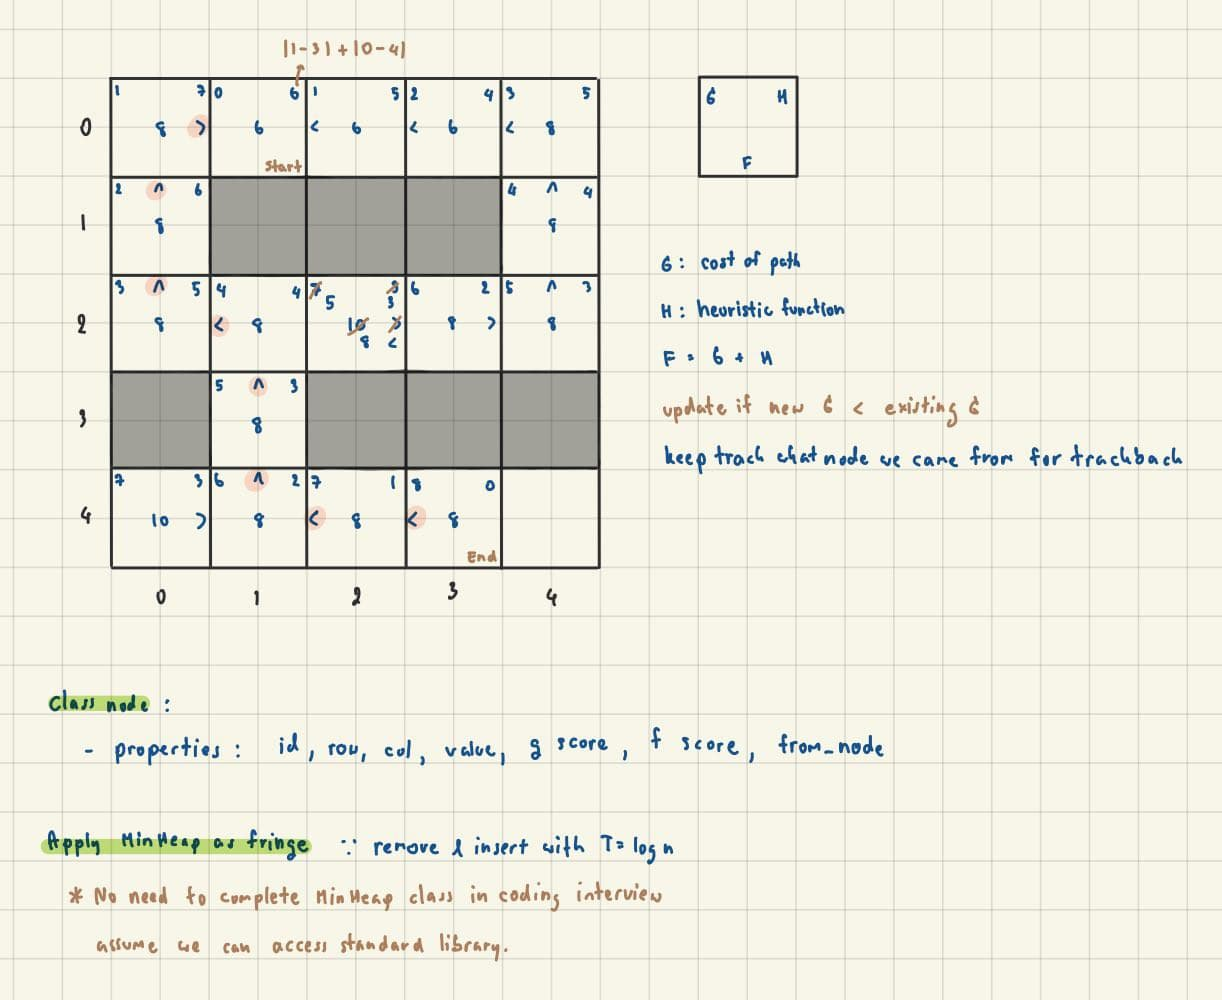

## Solution

In [1]:
# Time = O(nlog n)
# Space = O(n)
# n = no. of node in gragh = w * h

def aStarAlgorithm(startRow, startCol, endRow, endCol, graph):
  # init fringe
  graph = init_graph(graph)

  start_node = graph[startRow][startCol]
  end_node = graph[endRow][endCol]
  start_node.g = 0
  start_node.f = cal_heuristic(start_node, end_node)

  fringe = MinHeap([start_node])

  while True:
    # is fringe empty?
    if fringe.heap == []:
      break

    # remove front
    front = fringe.remove()

    # is goal
    if front == end_node:
      break

    # gen/insert successor
    neighbors = get_neighbors(front, graph)
    for neighbor in neighbors:
      if neighbor.value == 1:
        continue
      
      tentative_neighbor_g = front.g + 1
      if tentative_neighbor_g >= neighbor.g:
        continue
      
      neighbor.from_node = front
      neighbor.g = tentative_neighbor_g
      neighbor.f = neighbor.g + cal_heuristic(neighbor, end_node)

      if not fringe.is_contain(neighbor):
        fringe.insert(neighbor)
      else:
        fringe.update(neighbor)

  return trackback_path(end_node)

def init_graph(graph):
  new_graph = []

  for i, row in enumerate(graph):
    new_graph.append([])
    for j, value in enumerate(row):
      new_graph[i].append(Node(i, j, value))
  
  return new_graph

def cal_heuristic(current_node, end_node):
  return abs(current_node.row - end_node.row) + abs(current_node.col - end_node.col)

def get_neighbors(current, graph):
  neighbors = []
  last_row = len(graph) - 1
  last_col = len(graph[0]) - 1

  if current.row <= last_row - 1: # down
    neighbors.append(graph[current.row + 1][current.col])
  
  if current.row >= 1: # up
    neighbors.append(graph[current.row - 1][current.col])
    
  if current.col <= last_col - 1: # right
    neighbors.append(graph[current.row][current.col + 1])
    
  if current.col >= 1: # left
    neighbors.append(graph[current.row][current.col - 1])
  
  return neighbors

def trackback_path(end_node):
  if end_node.from_node == None:
    return []

  current_node = end_node
  path = []

  while current_node != None:
    path.append([current_node.row, current_node.col])
    current_node = current_node.from_node
  
  return path[::-1]

class Node:
  def __init__(self, row, col, value):
    self.id = (row, col)
    self.row = row
    self.col = col
    self.value = value
    self.g = float('inf')
    self.f = float('inf')
    self.from_node = None

class MinHeap:
  def __init__(self, array):
    self.heap = self.build_heap(array)
    self.node_position_in_heap = {node.id: idx for idx, node in enumerate(self.heap)}

  def build_heap(self, array):
    last_parent = (len(array) - 2) // 2
    for idx in reversed(range(last_parent + 1)):
      self.sift_down(idx, array)
    return array
  
  def sift_down(self, idx, heap):
    child_one_idx = (2 * idx) + 1
    child_two_idx = (2 * idx) + 2
    end_idx = len(heap) - 1
    while child_one_idx <= end_idx:
      if child_two_idx <= end_idx and heap[child_two_idx].f < heap[child_one_idx].f:
        idx_to_swap = child_two_idx
      else:
        idx_to_swap = child_one_idx
      
      if heap[idx_to_swap].f < heap[idx].f:
        self.swap(idx, idx_to_swap, heap)
        idx = idx_to_swap
        child_one_idx = (2 * idx) + 1
        child_two_idx = (2 * idx) + 2
      else:
        return

  def sift_up(self, idx, heap):
    parent_idx = (idx - 1) // 2
    while idx > 0 and heap[idx].f < heap[parent_idx].f:
      self.swap(idx, parent_idx, heap)
      idx = parent_idx
      parent_idx = (idx - 1) // 2

  def remove(self, idx = 0):
    self.swap(idx, len(self.heap) - 1, self.heap)
    removed_node = self.heap.pop()
    del self.node_position_in_heap[removed_node.id]
    self.sift_down(idx, self.heap)
    return removed_node
  
  def insert(self, node):
    self.heap.append(node)
    self.node_position_in_heap[node.id] = len(self.heap) - 1
    self.sift_up(len(self.heap) - 1, self.heap)
  
  def update(self, node):
    self.sift_up(self.node_position_in_heap[node.id], self.heap)

  def swap(self, i, j, heap):
    self.node_position_in_heap[heap[i].id] = j
    self.node_position_in_heap[heap[j].id] = i
    heap[i], heap[j] = heap[j], heap[i]
  
  def is_contain(self, node):
    return node.id in self.node_position_in_heap

In [2]:
startCol = 1
startRow = 0
endCol = 3
endRow = 4
graph = [
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0],
    [1, 0, 1, 1, 1],
    [0, 0, 0, 0, 0]
  ]

In [3]:
print(aStarAlgorithm(startRow, startCol, endRow, endCol, graph))

[[0, 1], [0, 0], [1, 0], [2, 0], [2, 1], [3, 1], [4, 1], [4, 2], [4, 3]]


In [4]:
startCol = 1
startRow = 1
endCol = 17
endRow = 18
graph = [
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
    [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
    [0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1],
    [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
  ]

In [5]:
print(aStarAlgorithm(startRow, startCol, endRow, endCol, graph))

[]
